In [ ]:
#Membros da equipe
#Davi do Nascimento Santos
#Lucas Herlon Moreira 

from math import *
from random import *

class Kmeans:
    def __init__(self, n_clusters):
        self.numClusters = n_clusters
        self.clusters = []
        self.centroides = []
        self.base = []
        self.anterior = []

    #Calcula a distância entre dois pontos de um plano 
    def distanciaEuclidiana(self, ponto, centroide):
        quant = len(ponto)
        distancia = 0
        for i in range(0, quant):
            distancia += pow((ponto[i] - centroide[i]), 2)
        distancia = sqrt(distancia)
        return distancia
    
    #Pega uma base de dados(pontos do plano) e escolhe de acordo com a quantidade de 
    # clusters quais serão os centroides
    def selectCentroides(self, x):
        quantEle = len(x)
        preenche = 0
        posiEle = []
        while(True):
            num = randint(0, quantEle-1)
            if (num not in posiEle):
                posiEle.append(num)
                preenche += 1
            if (preenche == self.numClusters):
                break
        y = []
        for i in range(0, self.numClusters):
            y.append(x[posiEle[i]])
        self.centroides = y

    #Pega a base de dados(pontos do plano) e os centroides e coloca em seus respectivos clusters
    def separador(self, x):
        self.base = x
        self.selectCentroides(x)
        array = []
        for i in range(0, self.numClusters):
            array.append([])
        for i in x:
            dis = 9999999
            cont =0
            posi = 0
            for j in self.centroides:
                if (self.distanciaEuclidiana(i, j) < dis):
                    dis = self.distanciaEuclidiana(i, j)
                    posi = cont
                cont += 1
            array[posi].append(i)
        self.clusters = array
        self.anterior = array

    #Pega os novos centroides e calcula os novos clusters
    def newSeparador(self):
        array = []
        for i in range(0, self.numClusters):
            array.append([])
        for i in self.base:
            dis = 9999999
            cont =0
            posi = 0
            for j in self.centroides:
                if (self.distanciaEuclidiana(i, j) < dis):
                    dis = self.distanciaEuclidiana(i, j)
                    posi = cont
                cont += 1
            array[posi].append(i)
        self.clusters = array
        self.newCentroides()
    
    #Pegar os clusters e calcular os novos centroides
    def newCentroides(self):
        centroides = []
        for i in self.clusters:
            aux = []
            for j in range(0, len(i[0])):
                cont = 0
                for k in i:
                    cont += k[j]
                cont = cont / len(i)
                aux.append(cont)
            centroides.append(aux)
        self.centroides = centroides
        if self.anterior == self.centroides:
            return self.centroides
        else: 
            self.anterior = self.centroides
            self.newSeparador()
    
    #Get centroides
    def getCentroides(self):
        return self.centroides
    
    #Get clusters
    def getClusters(self):
        return self.clusters
    
    #Retorna os clusters
    def retornaClusters(self):
        all = []
        for i in range(0, len(self.clusters)):
            clus = []
            x = []
            y = []
            for j in self.clusters[i]:
                x.append(j[0])
                y.append(j[1])
            clus.append(x)
            clus.append(y)
            all.append(clus)
        return all

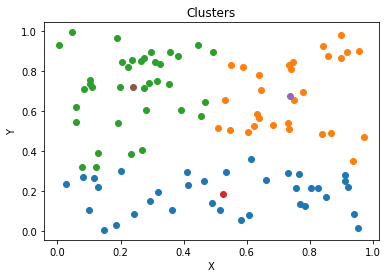

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import random
import numpy as np
#Minha base de dados
dados = []
for i in range(0, 100):
    dados.append([random(), random()])

#Criação do objeto teste 
teste = Kmeans(3)
teste.separador(dados)
teste.newCentroides()
#print(teste.getCentroides())
#print(teste.getClusters())



#seleciona os clusters para serem mostrados no gráfico
posi = teste.retornaClusters()
for i in posi:
    plt.scatter(i[0], i[1])
  
#seleciona os centroides para serem mostrados no gráfico  
centroides = teste.getCentroides()
for i in centroides:
    plt.scatter(i[0], i[1])
#plt.scatter(y)
# Define os rótulos dos eixos
plt.xlabel('X')
plt.ylabel('Y')

# Define o título do gráfico
plt.title('Clusters')

# Mostra o gráfico
plt.show()